### Задание 1

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline 
%config inlinebackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

In [41]:
boston = load_boston()

In [42]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [43]:
X = boston.data
y = boston.target
feature_names = boston.feature_names

In [44]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2, shuffle = True, random_state = 42)

In [123]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [126]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [127]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

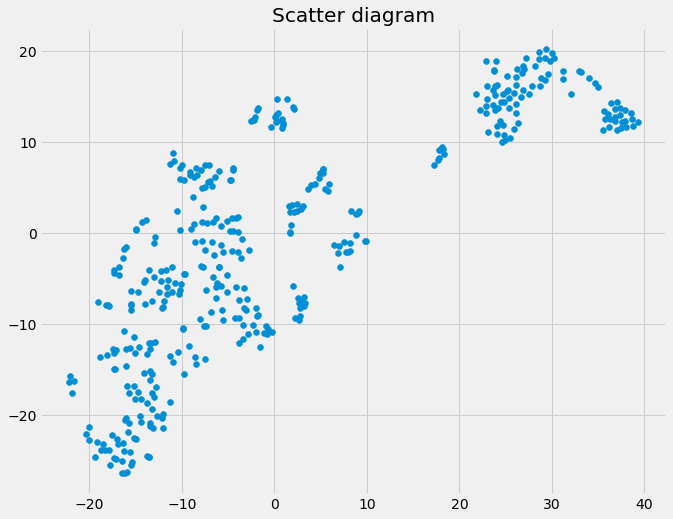

In [128]:
plt.figure(figsize = (10,8))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], )
plt.title('Scatter diagram')
plt.show()

### Задание 2

In [129]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,max_iter = 100, random_state = 42)

In [130]:
labels_train = kmeans.fit_predict(X_train_scaled)

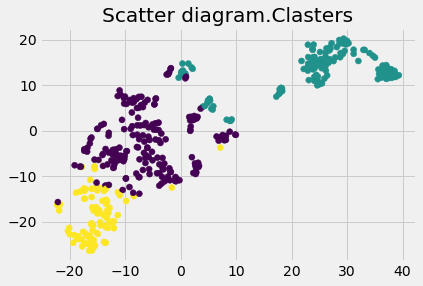

In [141]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c = kmeans.labels_)
plt.title('Scatter diagram.Clasters')
plt.show()

In [137]:
print(y_train[labels_train==0].mean())
print(X_train.loc[labels_train==0,'CRIM'].mean())

24.958115183246072
0.4216602094240837


In [139]:
print(y_train[labels_train==1].mean())
print(X_train.loc[labels_train==1,'CRIM'].mean())

16.165354330708663
10.797028425196851


In [138]:
print(y_train[labels_train==2].mean())
print(X_train.loc[labels_train==2,'CRIM'].mean())

27.78837209302326
0.07356558139534884


### Задание 3

In [152]:
labels_test = kmeans.predict(X_test_scaled)
labels_test

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [149]:
print(y_test[labels_test==0].mean())
print(X_test.loc[labels_test==0,'CRIM'].mean())

21.860784313725492
0.2660788235294118


In [150]:
print(y_test[labels_test==1].mean())
print(X_test.loc[labels_test==1,'CRIM'].mean())

16.43714285714286
10.165531142857143


In [151]:
print(y_test[labels_test==2].mean())
print(X_test.loc[labels_test==2,'CRIM'].mean())

31.35
0.06206
